# Бонусный урок про вино 

In [10]:
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!ls

Bonus_wine.ipynb                     optimiztion_w3.txt
Cat_Task.ipynb                       optimiztion_w3_1.txt
Func_approximation.ipynb             optimiztion_w3_2.txt
Linear_Algebra.ipynb                 optimiztion_w3_3.txt
Python_Practice_stepik.ipynb         result_cats.txt
Week1_Task1.ipynb                    s2.txt
Week_2.ipynb                         sample_distribution_evaluation.ipynb
Week_3_Optimiztion.ipynb             second_file.txt
data_sample_example.tsv              sentences.txt
local_file.txt                       stochastic_variables.ipynb
logo.png                             submissions.txt
loops.ipynb                          write_file.txt
matrix_operations.ipynb


In [6]:
wine = pd.read_csv('../Week_4/wine_data.csv', sep='\t')

In [22]:
wine.sample(frac=1)

,Type,Fixed acidity (g/l),Volatile acidity (g/l),Citric acid (g/l),Residual sugar (g/l),Chlorides (g/l),Free sulfur dioxide (mg/l),Total sulfur dioxide (mg/l),Density (g/cm3),pH,Sulphates (g/l),Alcohol (%),quality
404,red,7.70,0.690,0.05,2.7,0.075,15.0,27.0,0.99740,3.26,0.61,9.1,5
4248,white,7.15,0.170,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6
3238,white,7.90,0.220,0.49,3.8,0.042,26.0,105.0,0.99300,3.10,0.39,10.5,5
1562,red,7.20,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
2653,white,7.00,0.310,0.52,1.7,0.029,5.0,61.0,0.99180,3.07,0.43,10.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,white,6.70,0.210,0.37,2.5,0.034,35.0,89.0,0.99130,3.25,0.50,11.0,7
2897,white,7.30,0.340,0.39,5.2,0.040,45.0,163.0,0.99250,3.30,0.47,12.4,6
1442,red,6.90,0.630,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5
2846,white,7.20,0.210,0.34,1.1,0.046,25.0,80.0,0.99200,3.25,0.40,11.3,6


In [13]:
wine.groupby('quality')['quality'].agg(lambda x: float(len(x))/wine.shape[0])

quality
3    0.004618
4    0.033246
5    0.329075
6    0.436509
7    0.166077
8    0.029706
9    0.000770
Name: quality, dtype: float64

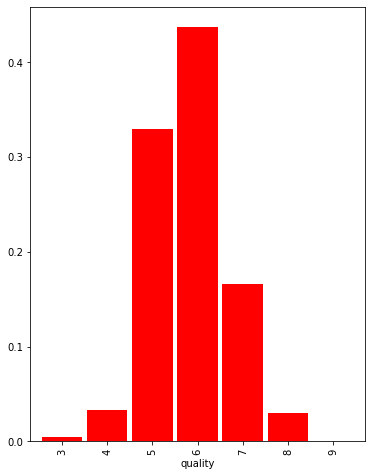

In [21]:
plt.figure(figsize=(6,8))
stat = wine.groupby('quality')['quality'].agg(lambda x: float(len(x))/wine.shape[0])
stat.plot(kind='bar', fontsize=10, width=0.9, color='r')
#plt.hist()
